In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


Hier laad ik de data in

In [2]:
crime = pd.read_csv('crime.csv')
codes = pd.read_csv('offense_codes.csv')


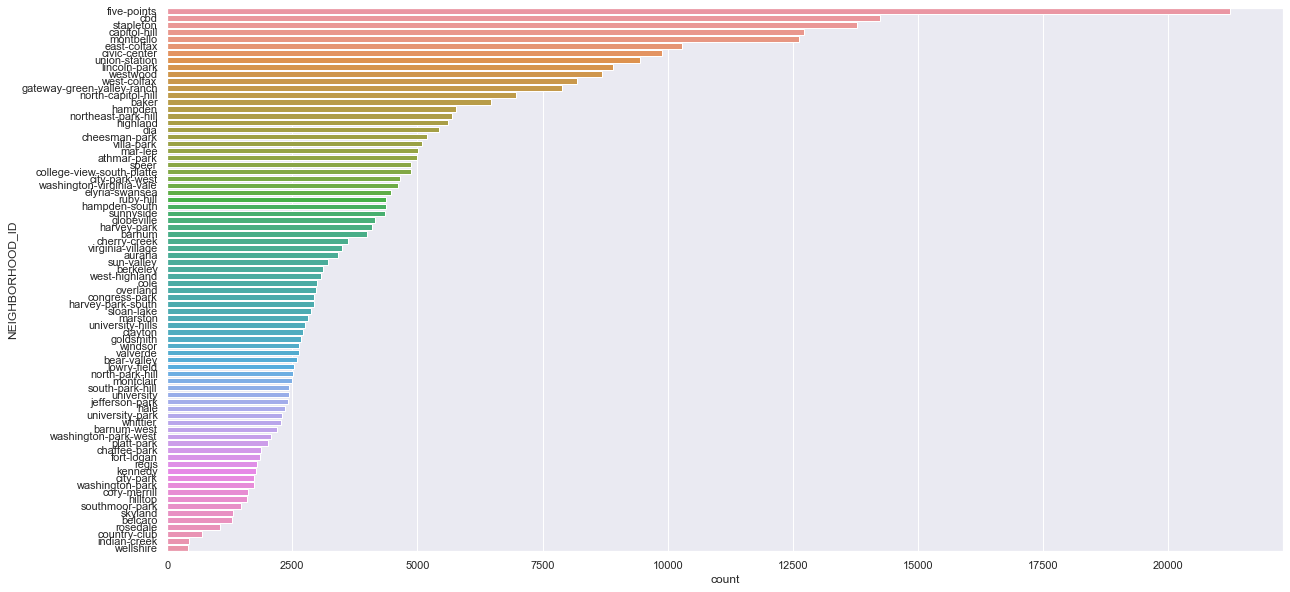

In [3]:
crime = crime[crime.IS_CRIME != 0]
sns.set(rc={ 'figure.figsize':(20.0, 10.0)})
sns.countplot(y='NEIGHBORHOOD_ID', data=crime, order=crime['NEIGHBORHOOD_ID'].value_counts().index)

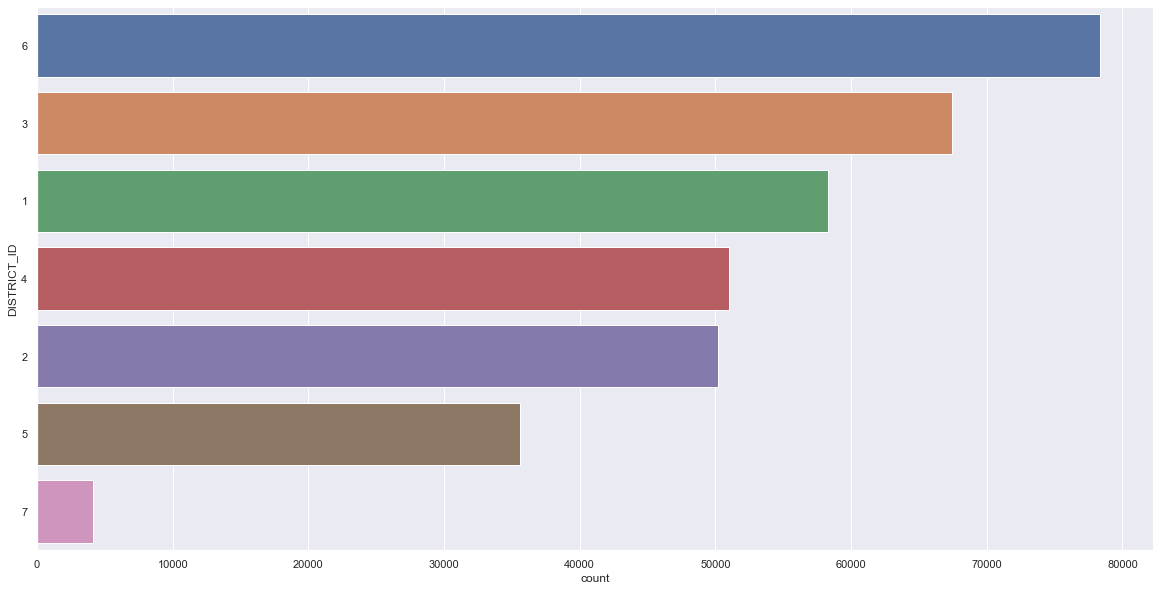

In [4]:
crime = crime[crime.IS_CRIME != 0]
sns.set(rc={ 'figure.figsize':(20.0, 10.0)})
sns.countplot(y='DISTRICT_ID', data=crime, order=crime['DISTRICT_ID'].value_counts().index)

Hier onder zet ik de Reported_date om om alleen het jaar weer te geven. Ook verwijder ik de rows waar de Reported_date 2020 is om zo een voorspelling te kunnen doen.

In [5]:
crime['REPORTED_DATE'] = crime['REPORTED_DATE'].str.split(' ').str[0]

In [6]:
crime['REPORTED_DATE'] = crime['REPORTED_DATE'].str[-4:]

Een check of het is gelukt

In [7]:
crime['REPORTED_DATE'].unique()

array(['2016', '2018', '2017', '2019', '2015', '2020'], dtype=object)

Ik haal de waardes van 2020 uit de dataframe zodat ik een voorspelling van 2020 kan maken.

In [8]:
indexNames = crime[crime['REPORTED_DATE']== '2020'].index
crime.drop(indexNames, inplace=True)

Hier kijk ik of er een lineair verband is tussen jaar en aantal reported crimes in de hele stad denver

In [9]:
df = crime.REPORTED_DATE.value_counts().reset_index()
df.rename(columns={'index' : 'Jaar', 'REPORTED_DATE' : 'Aantal crime'}, inplace=True)
x = df[['Jaar']]
y = df['Aantal crime']
reg = LinearRegression().fit(x, y)
print(reg.score(x, y))
print(reg.coef_)

0.1291954698779303
[403.5]


Uit de r2 waarden is te halen dat dit verband zeer zwak is en hier geen goede voorspelling uit te halen


Ik deel de dataframe in losse dataframes op gesplitst op Districts zodat ik per district kan kijken of er een verband is

In [10]:
destrict1 = crime.loc[crime['DISTRICT_ID'] == 1]
destrict2 = crime.loc[crime['DISTRICT_ID'] == 2]
destrict3 = crime.loc[crime['DISTRICT_ID'] == 3]
destrict4 = crime.loc[crime['DISTRICT_ID'] == 4]
destrict5 = crime.loc[crime['DISTRICT_ID'] == 5]
destrict6 = crime.loc[crime['DISTRICT_ID'] == 6]

In [11]:
destrict1 = destrict1.REPORTED_DATE.value_counts().reset_index()
destrict1.rename(columns={'index' : 'Jaar', 'REPORTED_DATE' : 'Aantal crime'}, inplace=True)
x = destrict1[['Jaar']]
y = destrict1['Aantal crime']
des1 = LinearRegression().fit(x, y)
print(des1.score(x, y))
print(des1.coef_)

0.045267071822540195
[-88.5]


de r2 waarde van district 1 is 0.04 dit houd in dat er geen liniear verband is en hier ook geen goede voorspelling uit gehaald kan worden.

In [12]:
destrict2 = destrict2.REPORTED_DATE.value_counts().reset_index()
destrict2.rename(columns={'index' : 'Jaar', 'REPORTED_DATE' : 'Aantal crime'}, inplace=True)
x = destrict2[['Jaar']]
y = destrict2['Aantal crime']
des2 = LinearRegression().fit(x, y)
print(des2.score(x, y))
print(des2.coef_)

0.43720281389518323
[-284.4]


voor district 2 is dit al iets beter met 0.43. alleen is deze waarden nog steeds te laag om een betrouwbare voorspelling te doen.

In [13]:
destrict3 = destrict3.REPORTED_DATE.value_counts().reset_index()
destrict3.rename(columns={'index' : 'Jaar', 'REPORTED_DATE' : 'Aantal crime'}, inplace=True)
x = destrict3[['Jaar']]
y = destrict3['Aantal crime']
des3 = LinearRegression().fit(x, y)
print(des3.score(x, y))
print(des3.coef_)

0.33428050133388154
[165.7]


voor district 3 is deze waarden ook te laag.

In [14]:
destrict4 = destrict4.REPORTED_DATE.value_counts().reset_index()
destrict4.rename(columns={'index' : 'Jaar', 'REPORTED_DATE' : 'Aantal crime'}, inplace=True)
x = destrict4[['Jaar']]
y = destrict4['Aantal crime']
des4 = LinearRegression().fit(x, y)
print(des4.score(x, y))
print(des4.coef_)

0.8234309102263178
[-410.9]


met een waarde van 0.82 kan er met 82% accuratie een daling van 410 cases in destrict 4 worden verwacht in 2020

In [15]:
destrict5 = destrict5.REPORTED_DATE.value_counts().reset_index()
destrict5.rename(columns={'index' : 'Jaar', 'REPORTED_DATE' : 'Aantal crime'}, inplace=True)
x = destrict5[['Jaar']]
y = destrict5['Aantal crime']
des5 = LinearRegression().fit(x, y)
print(des5.score(x, y))
print(des5.coef_)

0.8636291427184596
[449.1]


met een accuratie v an 86% kan er een steigin van 449 gevallen in district 5 worden verwacht

In [16]:
destrict6 = destrict6.REPORTED_DATE.value_counts().reset_index()
destrict6.rename(columns={'index' : 'Jaar', 'REPORTED_DATE' : 'Aantal crime'}, inplace=True)
x = destrict6[['Jaar']]
y = destrict6['Aantal crime']
des6 = LinearRegression().fit(x, y)
print(des6.score(x, y))
print(des6.coef_)

0.7611959163655124
[468.2]


met een accuratie van 76% kan er een stijging van 468 gevallen worden verwacht in district 6 in 2020.